In [1]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

import nltk, string
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_20newsgroups


categories = ['comp.sys.ibm.pc.hardware', 'comp.graphics','comp.sys.mac.hardware', 'comp.os.ms-windows.misc','rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset='all', categories=categories,shuffle=True, random_state=42)


In [2]:
#Question 1

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english',min_df=3)
X_train_tfidf = tfidf_vect.fit_transform(dataset.data) 
print("Shape of TF-IDF matrix: ", X_train_tfidf.shape)


Shape of TF-IDF matrix:  (7882, 27768)


In [3]:
#Question 2

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix, homogeneity_score, v_measure_score, completeness_score, adjusted_rand_score, adjusted_mutual_info_score

y_true = [int(i/4) for i in dataset.target]

km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
print("Contingency table: ", con_mat)

Contingency table:  [[   4 3899]
 [1718 2261]]


In [4]:
#Question 3

print("Homogeneity score: ", homogeneity_score(y_true,y_pred))
print("Completeness score: ",completeness_score(y_true,y_pred))
print("V-measure score: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score: ",adjusted_mutual_info_score(y_true,y_pred))

Homogeneity score:  0.2535958928926043
Completeness score:  0.334815748824373
V-measure score:  0.28860033608397917
Adjusted Rand score:  0.18076179588914548
Adjusted mutual information score:  0.28852620768137605


Text(0, 0.5, 'Total Explained Variance Ratio')

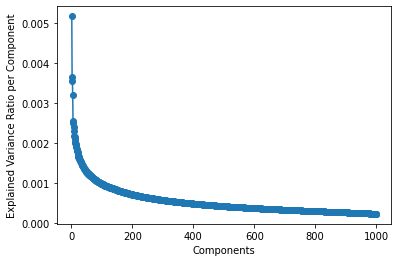

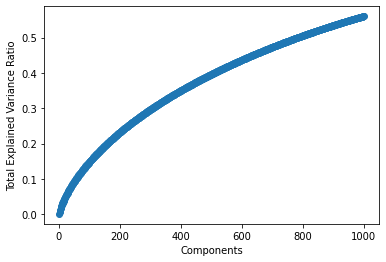

In [5]:
#Question 4 

from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000,random_state=42)
X_train_svd = svd.fit_transform(X_train_tfidf)
plt.figure()
plt.plot(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True))
plt.scatter(np.arange(1000)+1,sorted(svd.explained_variance_ratio_,reverse=True),)
plt.xlabel("Components"); plt.ylabel("Explained Variance Ratio per Component")

plt.figure()
plt.plot(np.arange(1000)+1,np.cumsum(svd.explained_variance_ratio_))
plt.scatter(np.arange(1000)+1,np.cumsum(svd.explained_variance_ratio_))
plt.xlabel("Components"); plt.ylabel("Total Explained Variance Ratio")

SVD
[0.00029275270509964866, 0.5783435715006476, 0.3955833570796594, 0.22152006534780616, 0.23462501869262953, 0.23622580967999646, 0.24162603939083188, 0.2459136851918752, 0.242488600144672]
[0.000297122118721392, 0.580917055004891, 0.43497359643597727, 0.30983180430366425, 0.3212187345416125, 0.32242397160243236, 0.3257637898975148, 0.32972145379678475, 0.32714066941714903]
[0.00029492122900643043, 0.5796274567694232, 0.4143444101956275, 0.25833714137938557, 0.2711767512281033, 0.27267481812015304, 0.27745655726190943, 0.28171670663624065, 0.2785246026362978]
[0.0003281607588681523, 0.6741826502926531, 0.3873449926208739, 0.14496247678573435, 0.1577989589471986, 0.15961920123127504, 0.16679707546182895, 0.1707597324152979, 0.16679709209461066]
[0.00020271945487688344, 0.5795888860421927, 0.41428824816710647, 0.25825794397675844, 0.2710996208286373, 0.2725979456601095, 0.2773805882185429, 0.28164136314170246, 0.27844872472650617]


/Users/kennyhuynh/opt/anaconda3/envs/KennyHuynh/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


NMF
[0.0003003030178761853, 0.5805753930376047, 0.027821445485245826, 0.37562649312171553, 0.09267200875838809, 0.0019120402724064785, 0.008734874759382975, 0.003444719931676562, 0.002163728856299646]
[0.0003047688479979988, 0.5975327335863215, 0.15578046049570043, 0.4332454920035562, 0.21597065707166085, 0.0025441502068279777, 0.013232995618956961, 0.005663833745154288, 0.0032608953501375862]
[0.0003025194525487269, 0.5889320238352856, 0.04721124833853736, 0.40238378337923136, 0.129693246200255, 0.0021832628911060627, 0.01052341965173116, 0.004283955869143768, 0.0026013574758204493]
[0.0003390408027462719, 0.6319404637555089, 0.003927942257354733, 0.34200153146083623, 0.03383565814396721, 0.0012379619230262304, 0.005683121258793998, 0.0016856298724459546, 0.0011139455990844534]
[0.00021032082455495874, 0.5888938483182365, 0.04706289491749549, 0.4023251704898573, 0.12958167529017284, 0.002078940382781518, 0.01041426109884003, 0.004170558556580682, 0.0024915538823062316]


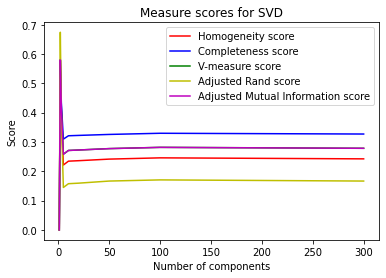

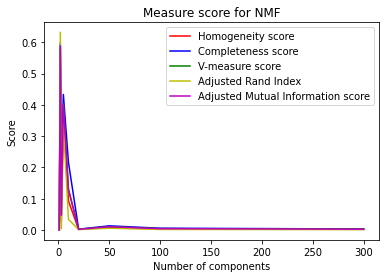

In [6]:
#Question 5

from sklearn.decomposition import NMF

r = [1,2,3,5,10,20,50,100,300]
hom_score = []; complt_score = []; v_score = []; adj_rand_score = []; adj_mut_inf_score = []
for i in r:
    y_pred = km.fit_predict(TruncatedSVD(n_components=i,random_state=42).fit_transform(X_train_tfidf))
    hom_score.append(homogeneity_score(y_true,y_pred))
    complt_score.append(completeness_score(y_true,y_pred))
    v_score.append(v_measure_score(y_true,y_pred))
    adj_rand_score.append(adjusted_rand_score(y_true,y_pred))
    adj_mut_inf_score.append(adjusted_mutual_info_score(y_true,y_pred))

fig, ax = plt.subplots()
ax.plot(r,hom_score, 'r', label='Homogeneity score')
ax.plot(r, complt_score, 'b', label='Completeness score')
ax.plot(r, v_score, 'g', label='V-measure score')
ax.plot(r,adj_rand_score,'y',label='Adjusted Rand score')
ax.plot(r,adj_mut_inf_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure scores for SVD")
print("SVD")
print(hom_score)
print(complt_score)
print(v_score)
print(adj_rand_score)
print(adj_mut_inf_score)

hom_score = []; complt_score = []; v_score = []; adj_rand_score = []; adj_mut_inf_score = []
for i in r:
    y_pred = km.fit_predict(NMF(n_components=i,init='random',random_state=42).fit_transform(X_train_tfidf))
    hom_score.append(homogeneity_score(y_true,y_pred))
    complt_score.append(completeness_score(y_true,y_pred))
    v_score.append(v_measure_score(y_true,y_pred))
    adj_rand_score.append(adjusted_rand_score(y_true,y_pred))
    adj_mut_inf_score.append(adjusted_mutual_info_score(y_true,y_pred))

fig, ax = plt.subplots()
ax.plot(r,hom_score, 'r', label='Homogeneity score')
ax.plot(r, complt_score, 'b', label='Completeness score')
ax.plot(r, v_score, 'g', label='V-measure score')
ax.plot(r,adj_rand_score,'y',label='Adjusted Rand Index')
ax.plot(r,adj_mut_inf_score,'m',label='Adjusted Mutual Information score')
ax.legend(loc='best')
plt.xlabel("Number of components"); plt.ylabel("Score"); plt.title("Measure score for NMF")
print("NMF")
print(hom_score)
print(complt_score)
print(v_score)
print(adj_rand_score)
print(adj_mut_inf_score)

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


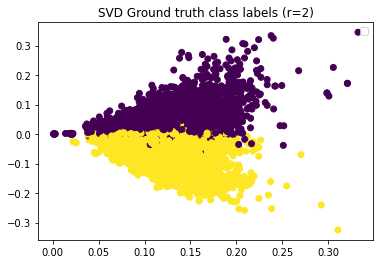

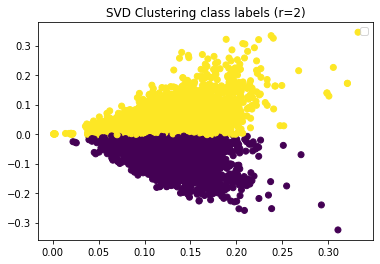

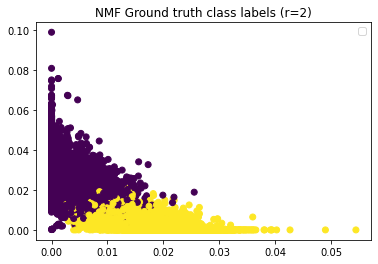

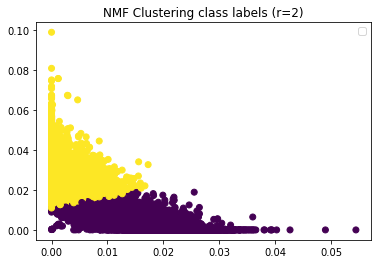

In [12]:
#Question 7

from sklearn.decomposition import NMF
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

r_best_svd = 2
r_best_nmf = 2

reduced_data_svd = TruncatedSVD(n_components=r_best_svd,random_state=0).fit_transform(X_train_tfidf)
plt.figure()
plt.scatter(reduced_data_svd[:,0],reduced_data_svd[:,1],c=y_true,cmap='viridis')
plt.title("SVD Ground truth class labels (r=2)"); plt.legend()

km = KMeans(n_clusters=2, random_state=0, max_iter=1000, n_init=30)
svd_labels = km.fit_predict(reduced_data_svd)
plt.figure()
plt.scatter(reduced_data_svd[:,0],reduced_data_svd[:,1],c=svd_labels,cmap='viridis')
plt.title("SVD Clustering class labels (r=2)"); plt.legend()

reduced_data_nmf = NMF(n_components=r_best_nmf,init='random',random_state=0).fit_transform(X_train_tfidf)
plt.figure()
plt.scatter(reduced_data_nmf[:,0],reduced_data_nmf[:,1],c=y_true,cmap='viridis')
plt.title("NMF Ground truth class labels (r=2)"); plt.legend()

nmf_labels = km.fit_predict(reduced_data_nmf)
plt.figure()
plt.scatter(reduced_data_nmf[:,0],reduced_data_nmf[:,1],c=nmf_labels,cmap='viridis')
plt.title("NMF Clustering class labels (r=2)"); plt.legend()

In [15]:
#Question 9

dataset = fetch_20newsgroups(subset='all',shuffle=True, random_state=42)
tfidf_vect = TfidfVectorizer(stop_words='english',min_df=3)
X_train_tfidf = tfidf_vect.fit_transform(dataset.data) # making the tfidf matrix
print(X_train_tfidf.shape)

y_true = dataset.target

km = KMeans(n_clusters=20, random_state=0, max_iter=1000, n_init=30)
y_pred = km.fit_predict(X_train_tfidf)
con_mat = contingency_matrix(y_true,y_pred)
print("Contingency table: ")
print(con_mat)

print("Homogeneity score for the whole corpus: ", homogeneity_score(y_true,y_pred))
print("Completeness score for the whole corpus: ",completeness_score(y_true,y_pred))
print("V-measure score for the whole corpus: ",v_measure_score(y_true,y_pred))
print("Adjusted Rand score for the whole corpus: ",adjusted_rand_score(y_true,y_pred))
print("Adjusted mutual information score for the whole corpus: ",adjusted_mutual_info_score(y_true,y_pred))

(18846, 52295)
Contingency table: 
[[ 57  40   0   1   5  84   0   0  83   1   0   0   2 401  36   9   0  80
    0   0]
 [ 82   0   1  16   1   1   2   0 241   0   0   4   1   3 525   0   0   0
    0  96]
 [ 33   0  18   2   0   0  11   0 126   0   2   2   0   0 206   0   0   0
    0 585]
 [ 25   0 230   7   1   0   5   0 175   0   0   5   0   0 437   0   3   0
    0  94]
 [ 25   0 103  10   0   0   1   0 372   0   0   3   0   1 437   0   0   0
    0  11]
 [ 86   0   1  25   0   0   2   0 143   3   0   4   0   1 569   0   0   0
    0 154]
 [  5   0  70   3  27   0   7   0 477   0   0  12   5   0 334   0  12   0
    0  23]
 [ 18   0   0   7 568   0   1   0 210   0   0   5   3   0 164  12   0   0
    0   2]
 [ 77   0   0  17 682   0   1   0 110   0   0  12   0   0  97   0   0   0
    0   0]
 [  2   0   0   2   0   0   1   0 312   0   0   2   4   1 171   0 499   0
    0   0]
 [  2   0   0   3   2   0   0   0 110   0   0  50   0   1  83   0 748   0
    0   0]
 [ 49   0   0   3   0   0  33 